# Proyek Analisis Data: Bike Sharing
- Nama: Noor Kharismawan Akbar
- Email: akbar.noorkharismawan@gmail.com
- Id Dicoding: [baramizzo](https://www.dicoding.com/users/baramizzo)

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Kapan waktu peminjaman sepeda dengan jumlah tertinggi dan terendah?
- Pertanyaan 2: Bagaimana kondisi lingkungan (cuaca & musim) berpengaruh terhadap jumlah peminjaman sepeda?
- Pertanyaan 3: Bagaimana hari masuk kerja & hari libur berpengaruh terhadap peminjaman sepeda?
- Pertanyaan 4: Bagaimana perbandingan antara jumlah pengguna biasa dan terdaftar?
- Pertanyaan 5: Bagaimana faktor lingkungan lain berpengaruh terhadap peminjaman sepeda?

## Menyiapkan semua library yang dibutUhkan

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

## Data Wrangling

### Gathering Data

Data didapat dari laman [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset). Dataset ini berisi jumlah sepeda sewaan per jam (`day.csv`) dan per hari (`hour.csv`) antara tahun 2011 dan 2012 di Capital bike share system dengan dilengkapi informasi cuaca dan musim.

#### Daily

In [296]:
df_day = pd.read_csv('data/day.csv')

In [297]:
display(df_day.head(),df_day.tail())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


#### Hourly

In [298]:
df_hour = pd.read_csv('data/hour.csv')

In [299]:
display(df_hour.head(),df_day.tail())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


### Assessing Data

#### Data Shape

##### Daily

In [300]:
df_day.shape

(731, 16)

Data daily memiliki **731 baris** & **16 kolom**.

##### Hourly

In [301]:
df_hour.shape

(17379, 17)

Data hourly memiliki lebih banyak data jika dibanding data daily, dimana memiliki **17,379 baris** & **17 kolom**

#### Data Info

##### Daily

In [302]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Data daily memiliki berbagai tipe data, yaitu `float64` (4 kolom), `int64` (11 kolom), `object` (1 kolom). Kolom `dteday` seharusnya memiliki tipe data `datetime`. Kita akan ubah nanti pada bagian **Data Cleaning**. Tidak ditemukan missing value pada seluruh kolom.

##### Hourly

In [303]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti data hourly, data daily memiliki berbagai tipe data, yaitu `float64` (4 kolom), `int64` (12 kolom), `object` (1 kolom). Kolom `dteday` seharusnya memiliki tipe data `datetime`. Kita akan ubah nanti pada bagian **Data Cleaning**. Tidak ditemukan missing value pada seluruh kolom.

#### Data Duplicate

##### Daily

In [304]:
df_day.duplicated().sum()

0

Tidak ditemukan data duplikat pada data daily.

##### Hourly

In [305]:
df_hour.duplicated().sum()

0

Tidak ditemukan data duplikat pada data hourly.

#### Descriptive statistics

##### Daily

In [306]:
df_day.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


Pada data daily, data numerikal cukup tersebar merata, kita akan tinjau lebih dalam menggunakan grafik pada bagian EDA.

##### Hourly

In [307]:
df_hour.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2011-01-01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


Sama seperti data daily, pada data hourly memuat data numerikal cukup tersebar merata, kita akan tinjau lebih dalam menggunakan grafik pada bagian EDA.

### Cleaning Data

#### Change Datetime

Seperti yang telah disebutkan pada bagian Data Info, terdapat kolom dteday yang tipe data nya kurang sesuai (`object`). Kita akan ubah menjadi tipe data `datetime`.

In [308]:
# Cek tipe data sebelum dirubah
print("df_day['dteday'] : ", df_day['dteday'].dtypes)
print("df_hour['dteday'] : ", df_hour['dteday'].dtypes)

df_day['dteday'] :  object
df_hour['dteday'] :  object


In [309]:
# df_day
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
# df_hour
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [310]:
# Cek tipe data setelah dirubah
print("df_day['dteday'] : ", df_day['dteday'].dtypes)
print("df_hour['dteday'] : ", df_hour['dteday'].dtypes)

df_day['dteday'] :  datetime64[ns]
df_hour['dteday'] :  datetime64[ns]


#### Change to the value should be

Menurut informasi yang didapat dari sumber dataset, kolom `temp`,`atemp`,`hum`, dan `windspeed` merupakan kolom yang sugah dinormalisasi. Kita akan balikkan ke nilai yang sebenarnya karena kita akan menganalisis nilai aktual dari masing-masing kolom tersebut.

In [311]:
# Deskripsi numerik normalisasi
df_day[['temp','atemp','hum','windspeed']].describe(include='all')

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


In [312]:
# Mengubah nilai normalisasi menjadi nilai aktual
df_day['temp'] = df_day['temp'].multiply(41)
df_day['atemp'] = df_day['atemp'].multiply(50)
df_day['hum'] = df_day['hum'].multiply(100)
df_day['windspeed'] = df_day['windspeed'].multiply(67)

In [313]:
# Deskripsi numerik aktual
df_day[['temp','atemp','hum','windspeed']].describe(include='all')

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,20.310776,23.717699,62.789406,12.762576
std,7.505091,8.148059,14.242910,5.192357
min,2.424346,3.953480,0.000000,1.500244
25%,13.820424,16.892125,52.000000,9.041650
50%,20.431653,24.336650,62.666700,12.125325
75%,26.872076,30.430100,73.020850,15.625371
max,35.328347,42.044800,97.250000,34.000021


#### Decode Season

Sesuai informasi dari sumber dataset, kolom `season` memuat sebuah musim yang telah di encode. Kita akan lakukan decode untuk mempermudah analisis.

In [314]:
# Cek value sebelum di decode
df_day.season.value_counts().sort_index()

1    181
2    184
3    188
4    178
Name: season, dtype: int64

In [315]:
# Decode kolom season
df_day.loc[df_day['season'] == 1, 'season'] = 'Springer'
df_day.loc[df_day['season'] == 2, 'season'] = 'Summer'
df_day.loc[df_day['season'] == 3, 'season'] = 'Fall'
df_day.loc[df_day['season'] == 4, 'season'] = 'Winter'

In [316]:
# Cek value setelah di decode
df_day.season.value_counts().sort_index()

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64

#### Decode year

Sesuai informasi dari sumber dataset, kolom `year` memuat sebuah musim yang telah di encode. Kita akan lakukan decode untuk mempermudah analisis.

In [317]:
# Cek value sebelum di decode
df_day.yr.value_counts().sort_index()

0    365
1    366
Name: yr, dtype: int64

In [318]:
# Decode kolom year
df_day.loc[df_day['yr'] == 0, 'yr'] = '2011'
df_day.loc[df_day['yr'] == 1, 'yr'] = '2012'

In [319]:
# Cek value setelah di decode
df_day.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

#### Decode holiday

Sesuai informasi dari sumber dataset, kolom `holiday` memuat sebuah musim yang telah di encode. Kita akan lakukan decode untuk mempermudah analisis.

In [320]:
# Cek value sebelum di decode
df_day.workingday.value_counts().sort_index()

0    231
1    500
Name: workingday, dtype: int64

In [321]:
# Decode kolom holiday
df_day.loc[df_day['holiday'] == 1, 'holiday'] = 'Holiday'
df_day.loc[df_day['holiday'] == 0, 'holiday'] = 'Not a Holiday'

In [322]:
# Cek value setelah di decode
df_day.workingday.value_counts().sort_index()

0    231
1    500
Name: workingday, dtype: int64

#### Decode weekday

Sesuai informasi dari sumber dataset, kolom `weekday` memuat sebuah musim yang telah di encode. Kita akan lakukan decode untuk mempermudah analisis.

In [323]:
# Cek value sebelum di decode
df_day.weekday.value_counts().sort_index()

0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: weekday, dtype: int64

In [324]:
# Decode kolom weekday
df_day.loc[df_day['weekday'] == 0, 'weekday'] = 'Sun'
df_day.loc[df_day['weekday'] == 1, 'weekday'] = 'Mon'
df_day.loc[df_day['weekday'] == 2, 'weekday'] = 'Tue'
df_day.loc[df_day['weekday'] == 3, 'weekday'] = 'Wed'
df_day.loc[df_day['weekday'] == 4, 'weekday'] = 'Thu'
df_day.loc[df_day['weekday'] == 5, 'weekday'] = 'Fri'
df_day.loc[df_day['weekday'] == 6, 'weekday'] = 'Sat'

In [325]:
# Cek value setelah di decode
df_day.weekday.value_counts().sort_index()

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

#### Decode working day

Sesuai informasi dari sumber dataset, kolom `workingday` memuat sebuah musim yang telah di encode. Kita akan lakukan decode untuk mempermudah analisis.

In [326]:
# Cek value sebelum di decode
df_day.workingday.value_counts().sort_index()

0    231
1    500
Name: workingday, dtype: int64

In [327]:
# Decode kolom workingday
df_day.loc[df_day['workingday'] == 0, 'workingday'] = 'Holiday'
df_day.loc[df_day['workingday'] == 1, 'workingday'] = 'Working Day'

In [328]:
# Cek value setelah di decode
df_day.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

#### Decode Weathersit

Sesuai informasi dari sumber dataset, kolom `weathersit` memuat sebuah musim yang telah di encode. Kita akan lakukan decode untuk mempermudah analisis.

In [329]:
# Cek value sebelum di decode
df_day.weathersit.value_counts().sort_index()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [330]:
# Decode kolom weathersit
df_day.loc[df_day['weathersit'] == 1, 'weathersit'] = 'Clear'
df_day.loc[df_day['weathersit'] == 2, 'weathersit'] = 'Mist + Cloudy'
df_day.loc[df_day['weathersit'] == 3, 'weathersit'] = 'Light Snow'
df_day.loc[df_day['weathersit'] == 4, 'weathersit'] = 'Heavy Rain'

In [331]:
# Cek value setelah di decode
df_day.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

#### Decode Weathersit (Hourly)

Sesuai informasi dari sumber dataset, kolom `weathersit` pada dataset `hourly` juga memuat sebuah musim yang telah di encode. Kita akan lakukan decode untuk mempermudah analisis.

In [332]:
# Cek value sebelum di decode
df_hour.weathersit.value_counts().sort_index()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [333]:
# Decode kolom weathersit (hourly)
df_hour.loc[df_hour['weathersit'] == 1, 'weathersit'] = 'Clear'
df_hour.loc[df_hour['weathersit'] == 2, 'weathersit'] = 'Mist + Cloudy'
df_hour.loc[df_hour['weathersit'] == 3, 'weathersit'] = 'Light Snow'
df_hour.loc[df_hour['weathersit'] == 4, 'weathersit'] = 'Heavy Rain'

In [334]:
# Cek value setelah di decode
df_hour.weathersit.value_counts().sort_index()

Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: weathersit, dtype: int64

## Exploratory Data Analysis (EDA)

### EDA `day_df`

In [335]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,Not a Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,2011,1,Not a Holiday,Sun,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,2011,1,Not a Holiday,Mon,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,2011,1,Not a Holiday,Tue,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,2011,1,Not a Holiday,Wed,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Kita akan melihat data historis peminjaman dari bulan ke bulan.

In [336]:
df_day['Month_Year'] = df_day['dteday'].dt.to_period('M')
rent_history = df_day.groupby(by='Month_Year').cnt.sum()
rent_history = rent_history.to_frame().reset_index()
rent_history

,Month_Year,cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


Kita akan coba lihat visualisasi dalam bentuk line chart.

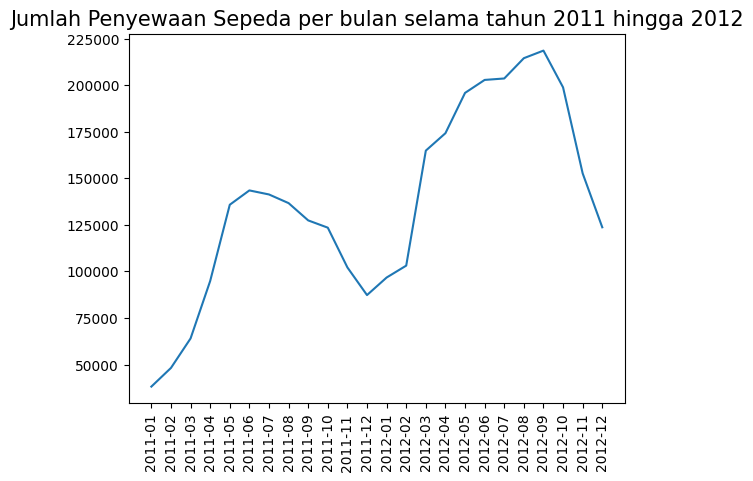

In [337]:
sns.lineplot(
    y = rent_history['cnt'],
    x = rent_history['Month_Year'].astype(str),
)
plt.title('Jumlah Penyewaan Sepeda per bulan selama tahun 2011 hingga 2012', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation=90)
plt.show()

Data historis menunjukkan grafik yang **meningkat** pada **tengah tahun (Bulan 05-09)**. Kemudian pada **akhir tahun (bulan 11-02)** cenderung **menurun**. Kemudian hal tersebut berulang di tahun berikutnya (tahun 2012).

Kita akan mencoba melihat persebaran kolom data numerik yang memuat informasi lingkungan, yaitu:
* Temperatur aktual (`temp`)
* Temperatur dirasakan (`atemp`)
* Kelembapan (`hum`)
* Kecepatan angin (`windspeed`)

In [338]:
day_num_df = df_day[['temp', 'atemp', 'hum', 'windspeed']]

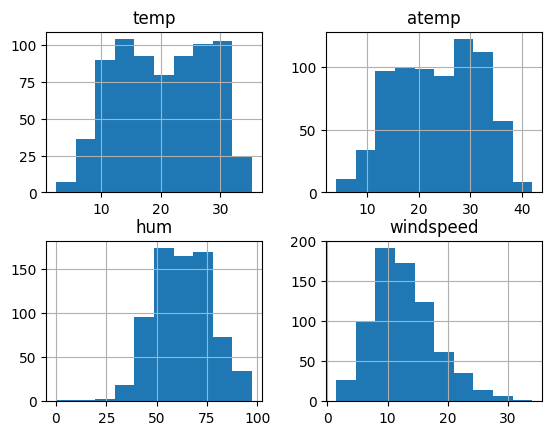

In [339]:
day_num_df.hist()
plt.show()

Terlihat untuk **temperatur aktual** & **dirasakan** memiliki persebaran yang lumayan **serupa dan berdistribusi normal**. Untuk **kelembapan** memiliki distribusi **right skewed**, sementara **kecepatan angin** berdistribusi **left skewed**.

Kemudian kita akan cek korelasi antar variabel tersebut.

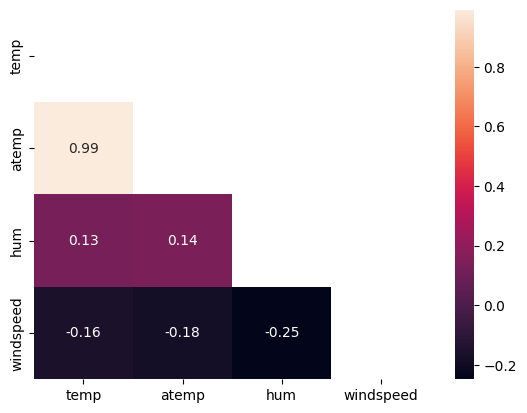

In [340]:
corr = day_num_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data = corr,mask=mask,annot=True)
plt.show()

Nilai **kedua nilai temperatur** memiliki korelasi sangat tinggi yaitu **0,99** , kita akan analisis lebih dalam pada bab selanjutnya. Sementara itu **variabel lain** memiliki korelasi **lebih rendah (<0.3)**.

### EDA `hour_df`

In [341]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [342]:
df_hour.groupby(by='hr').agg({'cnt': 'sum',})

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


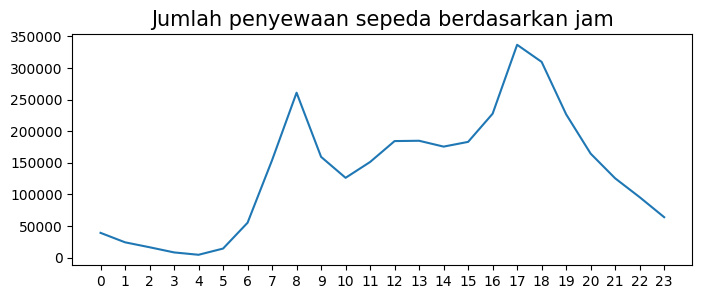

In [343]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan jam
byhour_df = df_hour.groupby(by='hr').cnt.sum()
byhour_df = byhour_df.to_frame().reset_index()
byhour_df

# Visualisasi dalam bar plot
plt.figure(figsize=(8, 3))
sns.lineplot(
    y = 'cnt',
    x = 'hr',
    data = byhour_df,
)
plt.title('Jumlah penyewaan sepeda berdasarkan jam', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(np.arange(min(byhour_df.hr), max(byhour_df.hr)+1, 1.0))
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu peminjaman sepeda dengan jumlah tertinggi dan terendah?

Untuk menjawab pertanyaan ini, kita akan melakukan **univariate analysis** pada rentang waktu **tahun, bulan, hari, dan jam**.

#### Tahun

In [344]:
byyr_df = df_day.groupby(by='yr').instant.nunique().reset_index()
byyr_df.rename(columns={'instant': 'sum'}, inplace=True)
byyr_df

,yr,sum
0,2011,365
1,2012,366


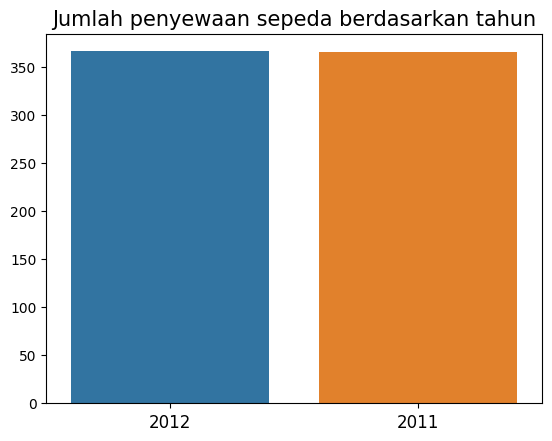

In [345]:
sns.barplot(
    y='sum',
    x='yr',
    data=byyr_df.sort_values(by='yr', ascending=False),
)

plt.title('Jumlah penyewaan sepeda berdasarkan tahun', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Dalam rentang tahun, hanya terdapat 2 data saja dan hasilnya sama, yaitu setiap hari pasti ada peminjaman sepeda.

#### Bulan

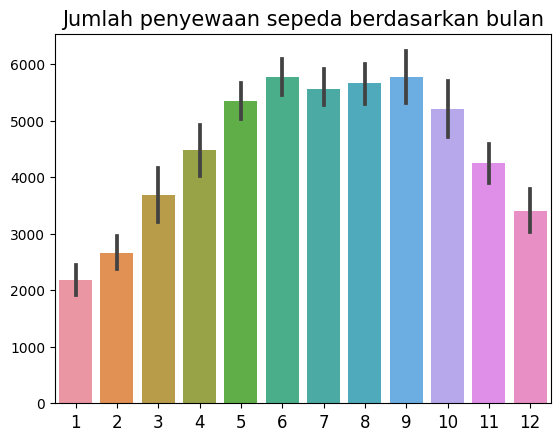

In [346]:
sns.barplot(
    y='cnt',
    x='mnth',
    data=df_day.sort_values(by='mnth', ascending=False),
)

plt.title('Jumlah penyewaan sepeda berdasarkan bulan', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

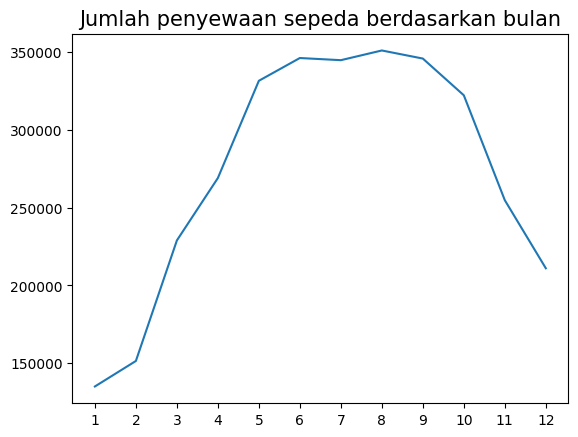

In [347]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan bulan
byhour_df = df_hour.groupby(by='mnth').cnt.sum()
byhour_df = byhour_df.to_frame().reset_index()
byhour_df

# Visualisasi dalam bar plot
sns.lineplot(
    y = 'cnt',
    x = 'mnth',
    data = byhour_df,
)
plt.title('Jumlah penyewaan sepeda berdasarkan bulan', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(np.arange(min(byhour_df.mnth), max(byhour_df.mnth)+1, 1.0))
plt.show()

Bulan paling **banyak** terjadi peminjaman yaitu diantara bulan **6 hingga 9**. Sementara paling **sedikit** di bulan **1 & 2**.

#### Hari

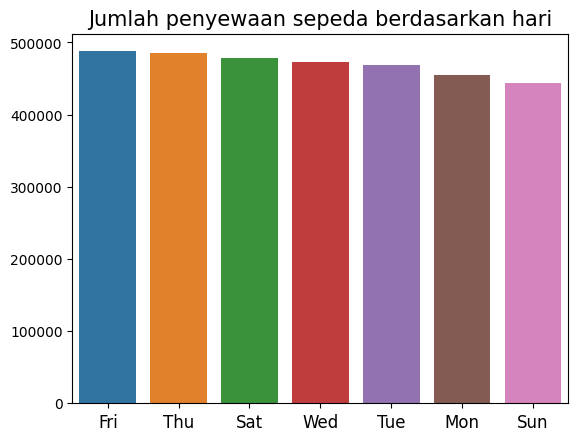

In [348]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan hari
byday_df = df_day.groupby(by='weekday').cnt.sum()
byday_df = byday_df.to_frame().reset_index()
byday_df

# Visualisasi dalam bar plot
sns.barplot(
    x = 'weekday',
    y = 'cnt',
    data = byday_df.sort_values(by="cnt", ascending=False),
)
plt.title('Jumlah penyewaan sepeda berdasarkan hari', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Hari paling **banyak** terjadi pemijaman yaitu pada hari **kamis & jumat**. Sementara paling **sedikit** hari **minggu & senin**.

#### Jam

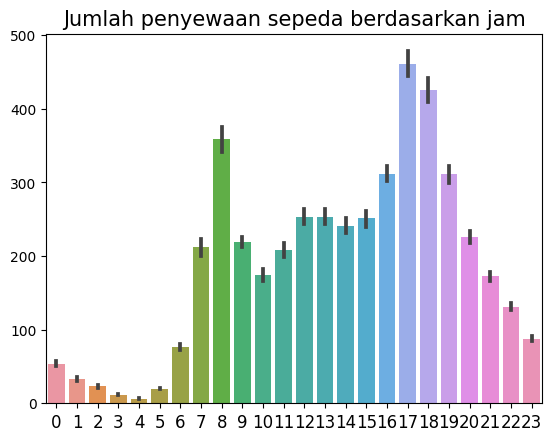

In [349]:
# plt.figure(figsize=(10, 5))

sns.barplot(
    y='cnt',
    x='hr',
    data=df_hour.sort_values(by='hr', ascending=False),
)
plt.title('Jumlah penyewaan sepeda berdasarkan jam', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

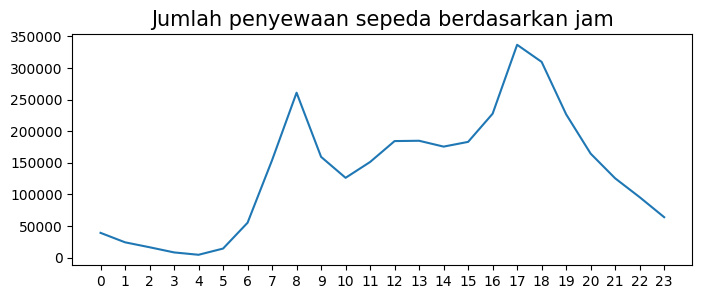

In [350]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan jam
byhour_df = df_hour.groupby(by='hr').cnt.sum()
byhour_df = byhour_df.to_frame().reset_index()
byhour_df

# Visualisasi dalam bar plot
plt.figure(figsize=(8, 3))
sns.lineplot(
    y = 'cnt',
    x = 'hr',
    data = byhour_df,
)
plt.title('Jumlah penyewaan sepeda berdasarkan jam', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(np.arange(min(byhour_df.hr), max(byhour_df.hr)+1, 1.0))
plt.show()

Berdasarkan grafik di atas, dapat dilihat tren peminjaman sepeda dimana jumlah peminjaman cenderung memiliki nilai yang rendah pada jam tidur yaitu pukul 0 hingga 5 pagi, dimana titik **terendah** ada di pukul **4 pagi**. Kemudian tren cenderung meningkat pada waktu masuk kerja & masuk sekolah yaitu pukul 8 pagi. Kemudian tren kembali meningkat lagi di waktu pulang kantor yaitu pukul 4-7 sore, dimana mencapai titik **tertinggi** pada pukul **5 sore**. Setelah office hour, tren peminjaman sepeda cenderung menurun hingga pagi hari.

### Pertanyaan 2: Bagaimana kondisi lingkungan (cuaca & musim) berpengaruh terhadap jumlah peminjaman sepeda?

Untuk menjawab pertanyaan ini, kita akan melakukan **univariate analysis** pada kolom **cuaca & musim**.

#### Cuaca

In [351]:
df_day['weathersit'].value_counts()

Clear            463
Mist + Cloudy    247
Light Snow        21
Name: weathersit, dtype: int64

In [352]:
byweathersit_df = df_day.groupby(by='weathersit').instant.nunique().reset_index()
byweathersit_df.rename(columns={'instant': 'sum'}, inplace=True)
byweathersit_df

,weathersit,sum
0,Clear,463
1,Light Snow,21
2,Mist + Cloudy,247


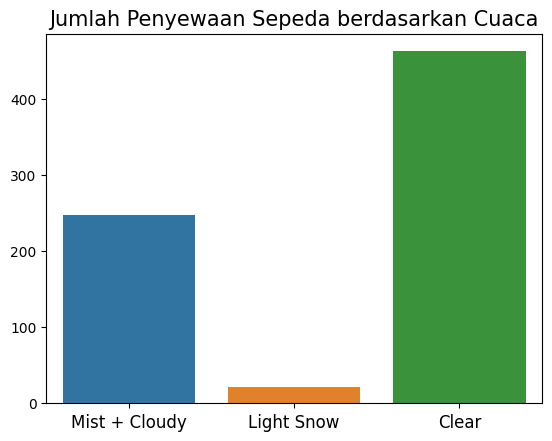

In [353]:
sns.barplot(
    y='sum',
    x='weathersit',
    data=byweathersit_df.sort_values(by='weathersit', ascending=False),
)

plt.title('Jumlah Penyewaan Sepeda berdasarkan Cuaca', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

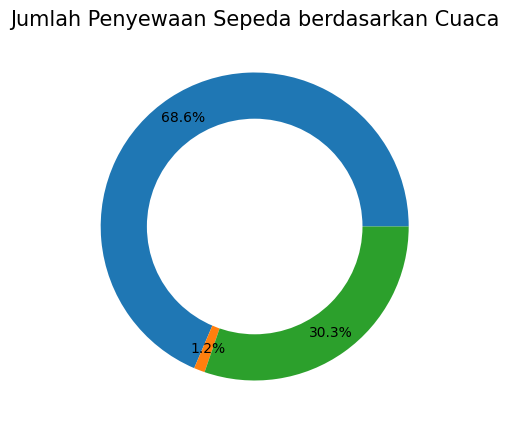

In [354]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan cuaca
byworkingday_df = df_day.groupby(by='weathersit').cnt.sum()
byworkingday_df

# Visualisasi dalam pie chart
plt.figure(figsize=(10, 5))
plt.pie(byworkingday_df, 
        autopct='%1.1f%%', pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Jumlah Penyewaan Sepeda berdasarkan Cuaca', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik di atas, dapat diketahui bahwa pengguna jasa rental sepeda **paling banyak** melakukan peminjaman pada saat kondisi cuaca **cerah (Clear)**. Sebaliknya, pada saat cuaca ber **salju** pengguna jasa rental sepeda cenderung **sedikit**.

#### Musim

In [355]:
df_day['season'].value_counts()

Fall        188
Summer      184
Springer    181
Winter      178
Name: season, dtype: int64

In [356]:
byseason_df = df_day.groupby(by='season').instant.nunique().reset_index()
byseason_df.rename(columns={'instant': 'sum'}, inplace=True)
byseason_df

,season,sum
0,Fall,188
1,Springer,181
2,Summer,184
3,Winter,178


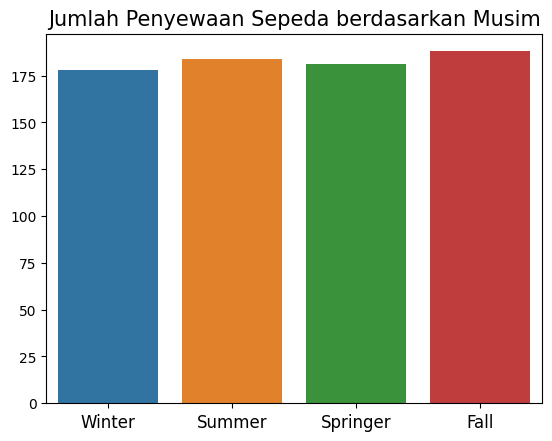

In [357]:
sns.barplot(
    y='sum',
    x='season',
    data=byseason_df.sort_values(by='season', ascending=False),
)

plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

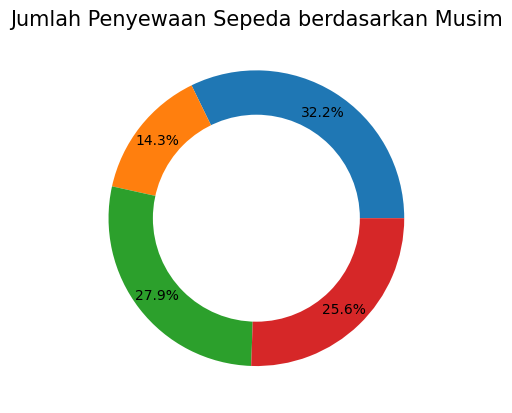

In [358]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan musim
byworkingday_df = df_day.groupby(by='season').cnt.sum()
byworkingday_df

# Visualisasi dalam pie chart
# plt.figure(figsize=(10, 5))
plt.pie(byworkingday_df, 
        autopct='%1.1f%%', pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik di atas, dapat diketahui bahwa pengguna jasa rental sepeda **paling banyak** melakukan peminjaman pada saat musim **gugur (Fall)**. Namun hasil tersebut tidak berbeda jauh jumlah peminjaman **paling sedikit** berdasarkan musim, yaitu **Winter**.

### Pertanyaan 3: Bagaimana hari masuk kerja & hari libur berpengaruh terhadap peminjaman sepeda?

Untuk menjawab pertanyaan ini, kita akan melakukan **univariate analysis** pada kolom **holiday & workingday**.

#### Kolom `holiday`

In [359]:
byholidyday_df = df_day.groupby(by='holiday').instant.nunique().reset_index()
byholidyday_df.rename(columns={'instant': 'sum'}, inplace=True)
byholidyday_df

,holiday,sum
0,Holiday,21
1,Not a Holiday,710


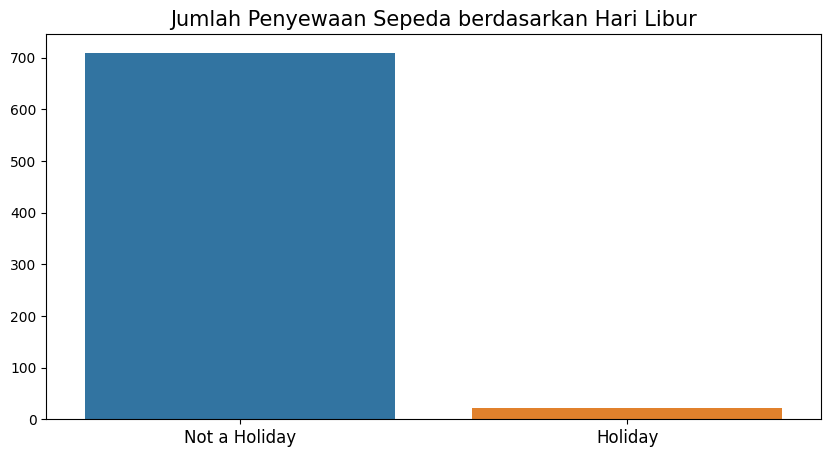

In [360]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y='sum',
    x='holiday',
    data=byholidyday_df.sort_values(by='holiday', ascending=False),
)
plt.title('Jumlah Penyewaan Sepeda berdasarkan Hari Libur', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

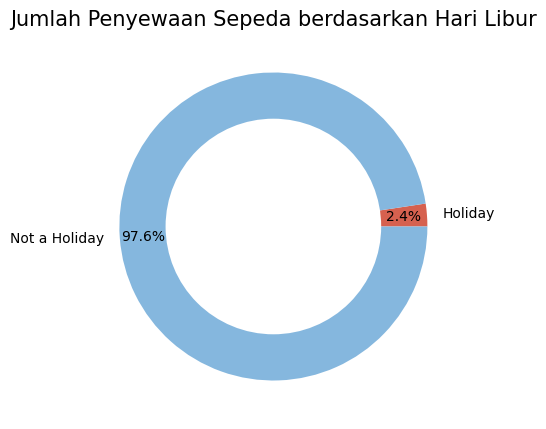

In [361]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan hari kerja
byholiday_df = df_day.groupby(by='holiday').cnt.sum()
byholiday_df

# Visualisasi dalam pie chart
plt.figure(figsize=(10, 5))
plt.pie(byholiday_df, colors=['#d6614f', '#85b7de'], labels=['Holiday', 'Not a Holiday'],
        autopct='%1.1f%%', pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Jumlah Penyewaan Sepeda berdasarkan Hari Libur', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Customer banyak menyewa sepeda pada hari tidak libur dengan persentase 97,6%. Untuk hari libur sangat sedikit yaitu 2,4%.

#### Kolom `workingday`

In [362]:
byworkingday_df = df_day.groupby(by='workingday').instant.nunique().reset_index()
byworkingday_df.rename(columns={'instant': 'sum'}, inplace=True)
byworkingday_df

,workingday,sum
0,Holiday,231
1,Working Day,500


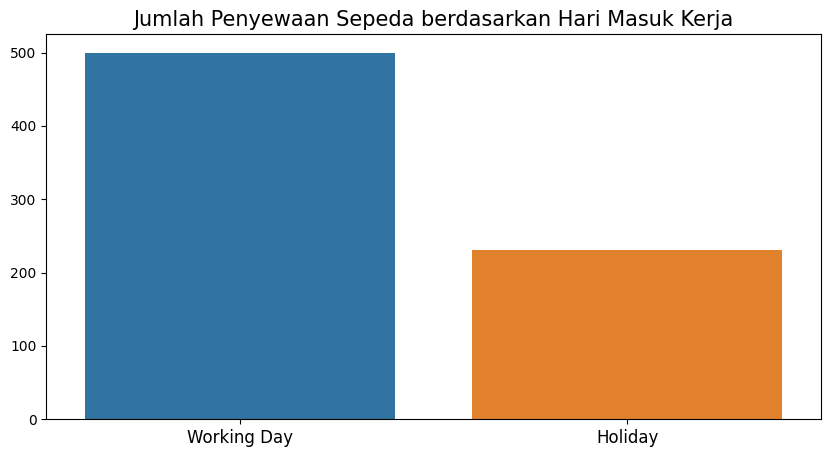

In [363]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y='sum',
    x='workingday',
    data=byworkingday_df.sort_values(by='workingday', ascending=False),
)
plt.title('Jumlah Penyewaan Sepeda berdasarkan Hari Masuk Kerja', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

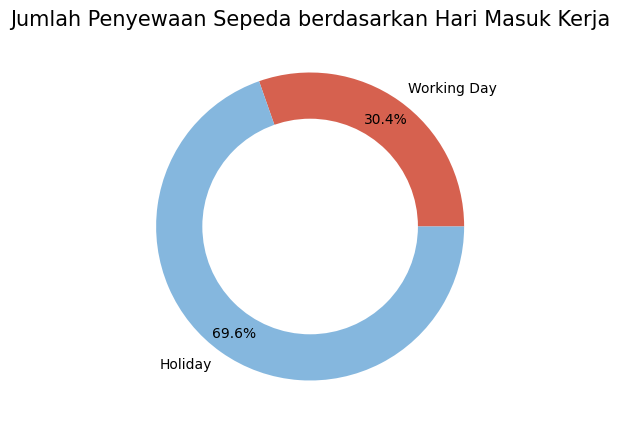

In [364]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan hari kerja
byworkingday_df = df_day.groupby(by='workingday').cnt.sum()
byworkingday_df

# Visualisasi dalam pie chart
plt.figure(figsize=(10, 5))
plt.pie(byworkingday_df, colors=['#d6614f', '#85b7de'], labels=['Working Day', 'Holiday'],
        autopct='%1.1f%%', pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Jumlah Penyewaan Sepeda berdasarkan Hari Masuk Kerja', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Sama seperti tren kolom holiday, tren kolom working day juga menunjukkan bahwa pada hari kerja lebih banyak customer yang menyewa sepeda, lebih dari 2/3 customer menggunakan sepeda pada hari kerja.

### Pertanyaan 4: Bagaimana perbandingan antara jumlah pengguna biasa dan terdaftar?

Untuk menjawab pertanyaan ini, kita akan melakukan **univariate analysis** pada kolom **casual & registered**.

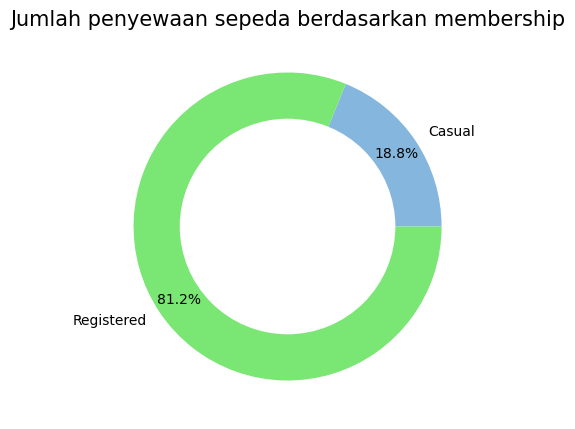

In [365]:
# Mengidentifikasi jumlah peminjam sepeda berdasarkan status membership
non_member = pd.Series(df_day['casual'].sum())
member = pd.Series(df_day['registered'].sum())
bymembership_df = pd.concat([non_member, member])
bymembership_df

# Visualisasi dalam pie chart
plt.figure(figsize=(10, 5))
plt.pie(bymembership_df, colors=['#85b7de', '#7ae673'], labels=['Casual', 'Registered'],
        autopct='%1.1f%%', pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Jumlah penyewaan sepeda berdasarkan membership', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Jumlah pengguna yang menjadi **member (registered) lebih banyak yang casual**. Bisa dilakukan berbagai promosi marketing untuk menarik pelanggan untuk mendaftar menjadi member untuk meningkatkan peminjam sepeda.

### Pertanyaan 5: Bagaimana faktor lingkungan lain berpengaruh terhadap peminjaman sepeda?

Untuk menjawab pertanyaan ini, kita akan melakukan **multivariate analysis** pada berbagai kolom numerikal.

#### Actual Temperature vs Rental Bikes

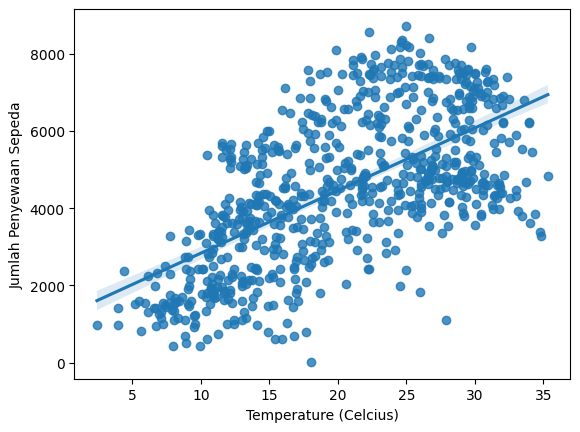

In [366]:
sns.regplot(x=df_day['temp'], y=df_day['cnt'])
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Temperatur aktual berbanding lurus dengan jumlah sepeda yang dipinjam. Semakin tinggi temperatur, semakin banyak sepeda yang dipinjam.

#### Feeling Temperature vs Rental Bikes

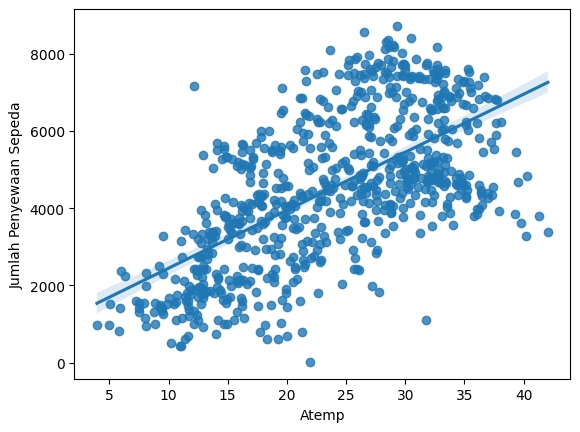

In [367]:
sns.regplot(x=df_day['atemp'], y=df_day['cnt'])
plt.xlabel('Atemp')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Sama seperti Temperatur aktual, temperatur yang dirasakan berbanding lurus dengan jumlah sepeda yang dipinjam. Semakin tinggi temperatur, semakin banyak sepeda yang dipinjam.

#### Humidity vs Rental Bikes

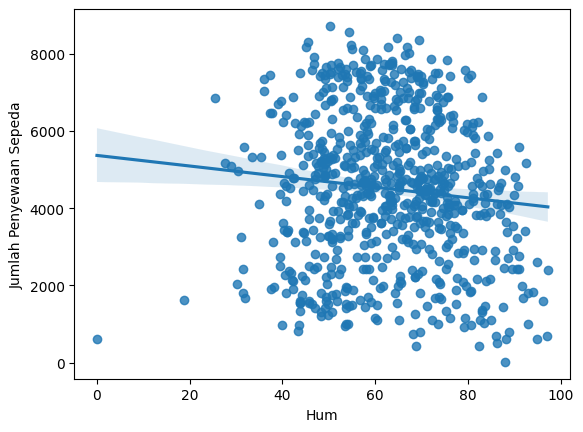

In [368]:
sns.regplot(x=df_day['hum'], y=df_day['cnt'])
plt.xlabel('Hum')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Kelembapan berbanding terbalik dengan jumlah sepeda yang dipinjam. Semakin tinggi kelembapan, semakin sedikit sepeda yang dipinjam.

#### Windspeed vs Rental Bikes

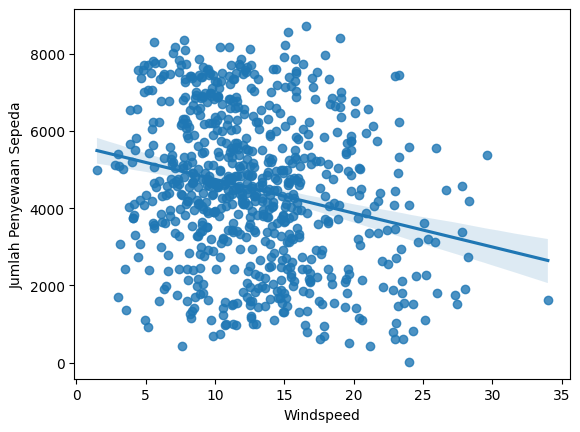

In [369]:
sns.regplot(x=df_day['windspeed'], y=df_day['cnt'])
plt.xlabel('Windspeed')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Kecepatan angin berbanding terbalik dengan jumlah sepeda yang dipinjam. Semakin tinggi kecepatan angin, semakin sedikit sepeda yang dipinjam.

## Conclusion

1.  Conclusion pertanyaan 1:
    * Pada tahun 2011 & 2012, setiap hari ada peminjaman sepeda.
    * Bulan paling **banyak** terjadi peminjaman yaitu diantara bulan **6 hingga 9**. Sementara itu peminjaman sepeda paling **sedikit** di bulan **1 & 2**. 
    * Hari paling **banyak** terjadi pemijaman yaitu pada hari **kamis & jumat**. Sementara paling **sedikit** hari **minggu & senin**. 
    * Peminjaman sepeda tertinggi ada saat jam berangkat & pulang kantor dimana mencapai titik **tertinggi** pada pukul **5 sore**. Peminjaman sepeda terendah ada di jam tidur, dimana titik **terendah** ada di pukul **4 pagi**.
2.  Conclusion pertanyaan 2:
    * Berdasarkan cuaca, customer **paling banyak** melakukan peminjaman pada saat kondisi cuaca **cerah (Clear)**. Sebaliknya, pada saat cuaca ber **salju** pengguna jasa rental sepeda cenderung **sedikit**.
    * Berdasarkan musim, customer **paling banyak** melakukan peminjaman pada saat musim **gugur (Fall)**. Namun hasil tersebut tidak berbeda jauh jumlah peminjaman **paling sedikit** berdasarkan musim, yaitu **Winter**.
3.  Conclusion pertanyaan 3:
    * Berdasarkan holiday, Customer banyak meminjam sepeda pada hari tidak libur dengan persentase **97,6%**. Untuk hari libur sangat sedikit yaitu **2,4%**.
    * Berdasarkan working day, Customer banyak meminjam sepeda pada hari kerja dengan persentase **69,6%**. Untuk hari libur sangat sedikit yaitu **18,8%**.
4.  Conclusion pertanyaan 4:
    * Jumlah pengguna yang menjadi **member (registered) lebih banyak yang casual**. Bisa dilakukan berbagai promosi marketing untuk menarik pelanggan untuk mendaftar menjadi member untuk meningkatkan peminjam sepeda.
5.  Conclusion pertanyaan 5:
    * Temperatur aktual berbanding lurus dengan jumlah sepeda yang dipinjam. Semakin tinggi temperatur, semakin banyak sepeda yang dipinjam.
    * temperatur yang dirasakan berbanding lurus dengan jumlah sepeda yang dipinjam. Semakin tinggi temperatur, semakin banyak sepeda yang dipinjam.
    * Kelembapan berbanding terbalik dengan jumlah sepeda yang dipinjam. Semakin tinggi kelembapan, semakin sedikit sepeda yang dipinjam.
    * Kecepatan angin berbanding terbalik dengan jumlah sepeda yang dipinjam. Semakin tinggi kecepatan angin, semakin sedikit sepeda yang dipinjam.

## Export Dataset

In [370]:
df_day.to_csv('dashboard\day_clean.csv', index=False)

## Teknik Analisis Lanjutan: RFM Analysis

Untuk melanjutkan analisis, kita akan menggunakan Analisis RFM. [Analisis RFM (Recency , Frequency, dan Monetary)](http://www.brucehardie.com/papers/rfm_clv_2005-02-16.pdf) adalah metode yang digunakan untuk menganalisis value dan segmentasi pelanggan yang umum digunakan dalam database & Direct. Metode ini telah mendapat perhatian khusus dalam industri layanan ritel dan profesional.

Dalam dataset ini, telah disesuaikan ketiga unsur RFM tersebut yang disajikan sebagai berikut:
* Recency – How recently did the customer purchase? -> kolom `dteday`
* Frequency – How often do they purchase? -> kolom `instant`
* Monetary Value – How much do they spend? -> kolom `cnt`

In [371]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month_Year
0,1,2011-01-01,Springer,2011,1,Not a Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,2011-01
1,2,2011-01-02,Springer,2011,1,Not a Holiday,Sun,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,2011-01
2,3,2011-01-03,Springer,2011,1,Not a Holiday,Mon,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2011-01
3,4,2011-01-04,Springer,2011,1,Not a Holiday,Tue,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2011-01
4,5,2011-01-05,Springer,2011,1,Not a Holiday,Wed,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2011-01


In [372]:
df_day.shape

(731, 17)

In [373]:
df_day['instant'].nunique()

731

In [374]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [375]:
df_hour.shape

(17379, 17)

In [376]:
# Menghitung rfm
current_date = max(df_hour['dteday'])
rfm_df = df_hour.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

# Tampilkan hasil
print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


In [377]:
rfm_df.head()

,registered,Recency,Frequency,Monetary
0,0,38,24,35
1,1,0,201,294
2,2,1,245,648
3,3,0,294,1154
4,4,3,307,1602


In [378]:
rfm_df.tail()

,registered,Recency,Frequency,Monetary
771,860,97,1,967
772,871,69,1,938
773,876,68,2,1916
774,885,102,1,976
775,886,110,1,977


In [379]:
rfm_df.shape

(776, 4)

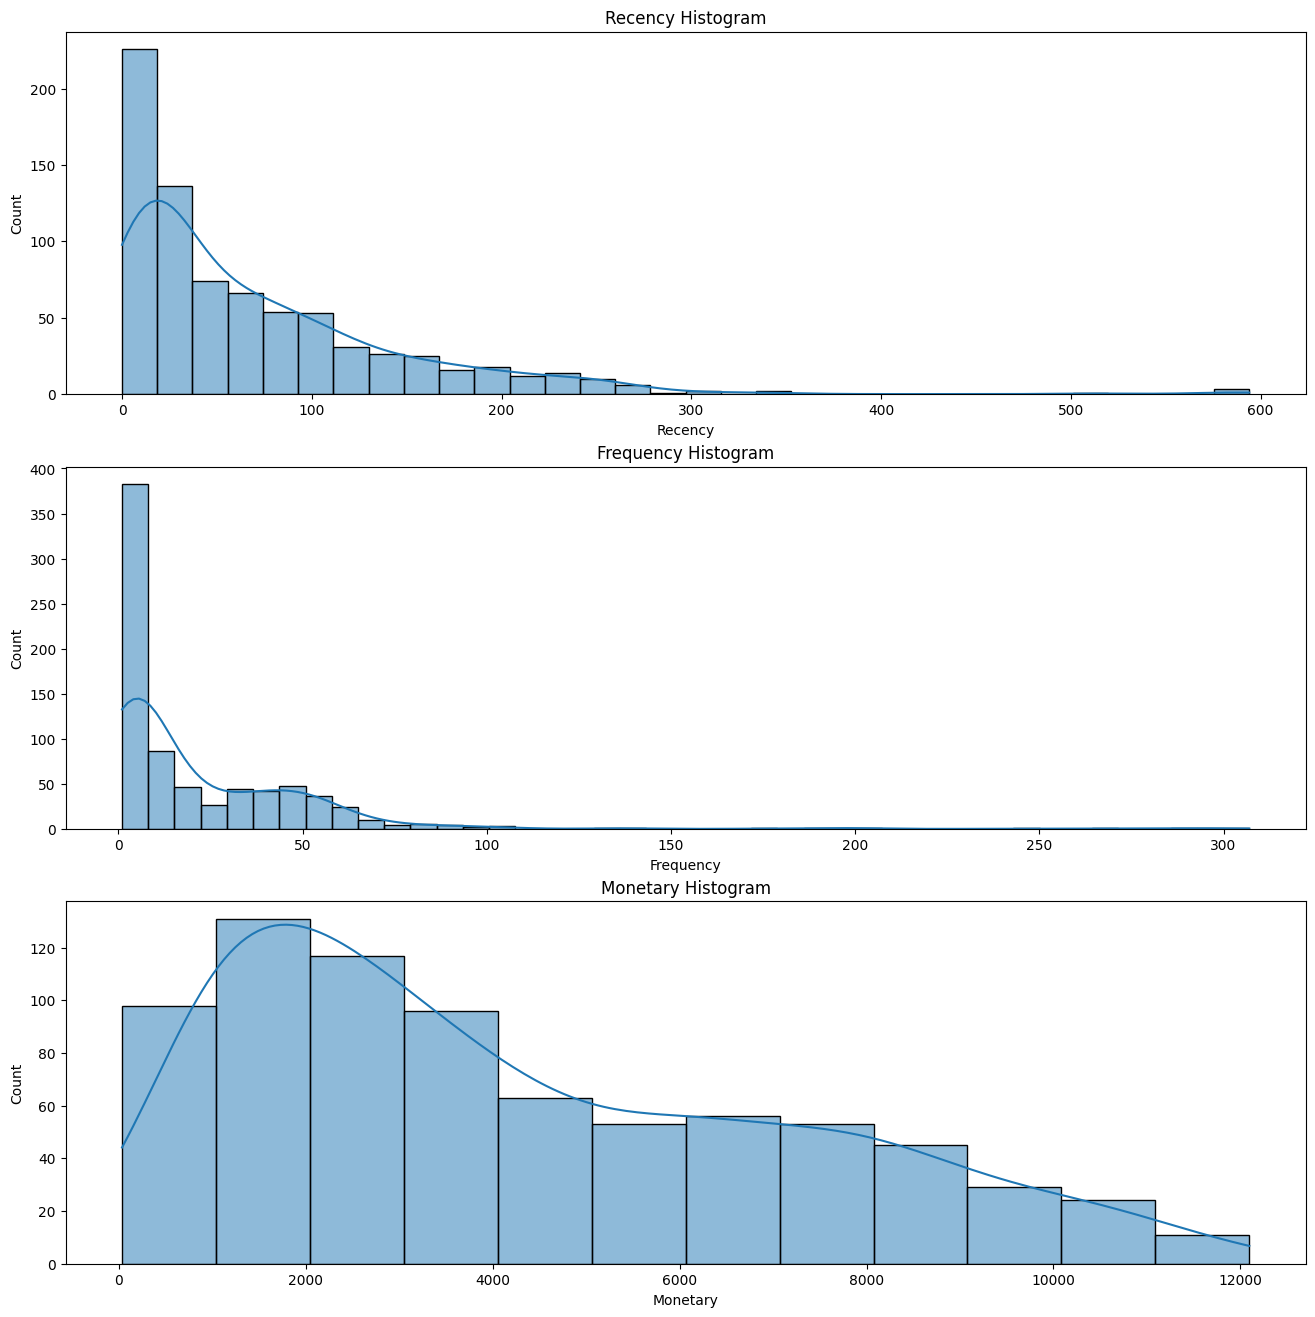

In [380]:
# Membuat grafik histogram RFM
fig, axes = plt.subplots(3,1, figsize=(16, 16))

sns.histplot(rfm_df['Recency'], kde=True, ax=axes[0])
axes[0].set_title('Recency Histogram')

sns.histplot(rfm_df['Frequency'], kde=True, ax=axes[1])
axes[1].set_title('Frequency Histogram')

sns.histplot(rfm_df['Monetary'], kde=True, ax=axes[2])
axes[2].set_title('Monetary Histogram')

plt.show()

In [381]:
r_labels = [5,4,3,2,1]
f_labels = [1,2,3,4,5]
m_labels = [1,2,3,4,5]

In [382]:
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 5, labels=r_labels).astype(int)
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'], 5, labels=f_labels).astype(int)
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 5, labels=m_labels).astype(int)

In [383]:
rfm_df['RFM_Segment'] = rfm_df.R_score.map(str)+rfm_df.F_score.map(str)+rfm_df.M_score.map(str)

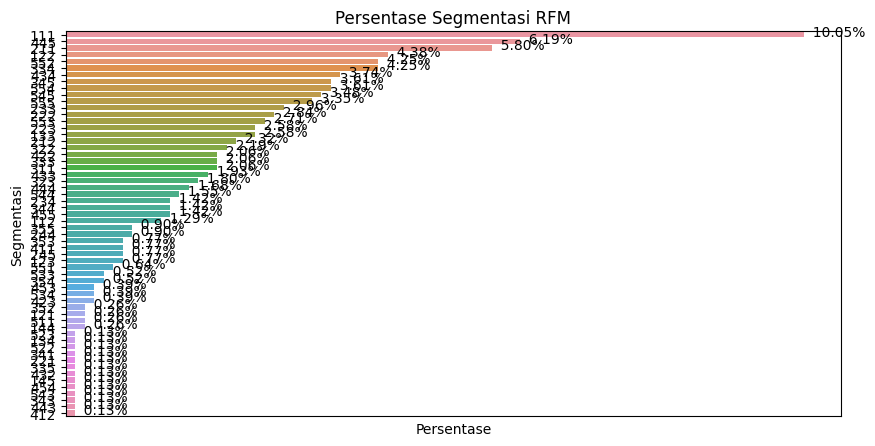

In [384]:
plt.figure(figsize=(10,5))
percentage = (rfm_df['RFM_Segment'].value_counts(normalize=True)* 100).reset_index(name='Persentase')
grafik_1 = sns.barplot(x=percentage['Persentase'],y=percentage['index'], data=percentage)

for i, v in enumerate(percentage['Persentase']):
    grafik_1.text(v,i+0.20,"  {:.2f}".format(v)+"%", ha="left")
grafik_1.set_ylabel('Segmentasi')
grafik_1.set(xticks=[])
grafik_1.set_title('Persentase Segmentasi RFM')

plt.show()

In [385]:
def get_segment(data):
    if (data['RFM_Segment'] == '555')|(data['RFM_Segment'] == '554')|(data['RFM_Segment'] == '544')|(data['RFM_Segment'] == '545')|(data['RFM_Segment'] == '454')|(data['RFM_Segment'] == '455')|(data['RFM_Segment'] == '445'):
        return 'Champions'
    elif (data['RFM_Segment'] == '543')|(data['RFM_Segment'] == '444')|(data['RFM_Segment'] == '435')|(data['RFM_Segment'] == '355')|(data['RFM_Segment'] == '354')|(data['RFM_Segment'] == '345')|(data['RFM_Segment'] == '344')|(data['RFM_Segment'] == '335'):
        return 'Loyal Customers'
    elif (data['RFM_Segment'] == '553')|(data['RFM_Segment'] == '551')|(data['RFM_Segment'] == '552')|(data['RFM_Segment'] == '541')|(data['RFM_Segment'] == '542')|(data['RFM_Segment'] == '533')|(data['RFM_Segment'] == '532')|(data['RFM_Segment'] == '531')|(data['RFM_Segment'] == '452')|(data['RFM_Segment'] == '451')|(data['RFM_Segment'] == '442')|(data['RFM_Segment'] == '441')|(data['RFM_Segment'] == '431')|(data['RFM_Segment'] == '453')|(data['RFM_Segment'] == '433')|(data['RFM_Segment'] == '432')|(data['RFM_Segment'] == '423')|(data['RFM_Segment'] == '353')|(data['RFM_Segment'] == '352')|(data['RFM_Segment'] == '351')|(data['RFM_Segment'] == '342')|(data['RFM_Segment'] == '341')|(data['RFM_Segment'] == '333')|(data['RFM_Segment'] == '323'):
        return 'Potential Loyalist'
    elif (data['RFM_Segment'] == '512')|(data['RFM_Segment'] == '511')|(data['RFM_Segment'] == '422')|(data['RFM_Segment'] == '421')|(data['RFM_Segment'] == '412')|(data['RFM_Segment'] == '411')|(data['RFM_Segment'] == '311'):
        return 'Recent Customers'
    elif (data['RFM_Segment'] == '525')|(data['RFM_Segment'] == '524')|(data['RFM_Segment'] == '523')|(data['RFM_Segment'] == '522')|(data['RFM_Segment'] == '521')|(data['RFM_Segment'] == '515')|(data['RFM_Segment'] == '514')|(data['RFM_Segment'] == '513')|(data['RFM_Segment'] == '425')|(data['RFM_Segment'] == '424')|(data['RFM_Segment'] == '413')|(data['RFM_Segment'] == '414')|(data['RFM_Segment'] == '415')|(data['RFM_Segment'] == '315')|(data['RFM_Segment'] == '314')|(data['RFM_Segment'] == '313'):
        return 'Promising'
    elif (data['RFM_Segment'] == '535')|(data['RFM_Segment'] == '534')|(data['RFM_Segment'] == '443')|(data['RFM_Segment'] == '434')|(data['RFM_Segment'] == '343')|(data['RFM_Segment'] == '334')|(data['RFM_Segment'] == '325')|(data['RFM_Segment'] == '324'):
        return 'Customer Needing Attention'
    elif (data['RFM_Segment'] == '331')|(data['RFM_Segment'] == '321')|(data['RFM_Segment'] == '312')|(data['RFM_Segment'] == '221')|(data['RFM_Segment'] == '213'):
        return 'About to Sleep'
    elif (data['RFM_Segment'] == '255')|(data['RFM_Segment'] == '254')|(data['RFM_Segment'] == '245')|(data['RFM_Segment'] == '244')|(data['RFM_Segment'] == '253')|(data['RFM_Segment'] == '252')|(data['RFM_Segment'] == '243')|(data['RFM_Segment'] == '242')|(data['RFM_Segment'] == '235')|(data['RFM_Segment'] == '234')|(data['RFM_Segment'] == '225')|(data['RFM_Segment'] == '224')|(data['RFM_Segment'] == '153')|(data['RFM_Segment'] == '152')|(data['RFM_Segment'] == '145')|(data['RFM_Segment'] == '143')|(data['RFM_Segment'] == '135')|(data['RFM_Segment'] == '134')|(data['RFM_Segment'] == '133')|(data['RFM_Segment'] == '125')|(data['RFM_Segment'] == '124'):
        return 'At Risk'
    elif (data['RFM_Segment'] == '155')|(data['RFM_Segment'] == '154')|(data['RFM_Segment'] == '144')|(data['RFM_Segment'] == '214')|(data['RFM_Segment'] == '215')|(data['RFM_Segment'] == '115')|(data['RFM_Segment'] == '114')|(data['RFM_Segment'] == '113'):
        return 'Cant Lose Them'
    elif (data['RFM_Segment'] == '332')|(data['RFM_Segment'] == '322')|(data['RFM_Segment'] == '231')|(data['RFM_Segment'] == '241')|(data['RFM_Segment'] == '251')|(data['RFM_Segment'] == '233')|(data['RFM_Segment'] == '232')|(data['RFM_Segment'] == '223')|(data['RFM_Segment'] == '222')|(data['RFM_Segment'] == '132')|(data['RFM_Segment'] == '123')|(data['RFM_Segment'] == '122')|(data['RFM_Segment'] == '212')|(data['RFM_Segment'] == '211'):
        return 'Hibernating'
    elif (data['RFM_Segment'] == '111')|(data['RFM_Segment'] == '112')|(data['RFM_Segment'] == '121')|(data['RFM_Segment'] == '131')|(data['RFM_Segment'] == '141')|(data['RFM_Segment'] == '151'):
        return 'Lost'
    return 'No Segment!'

In [386]:
rfm_df['segment'] = rfm_df.apply(get_segment,axis=1)

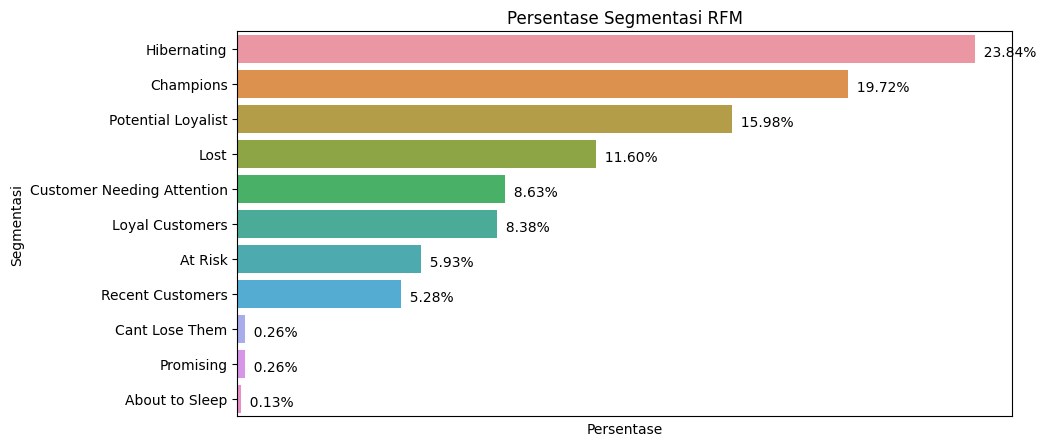

In [387]:
plt.figure(figsize=(10,5))
percentage = (rfm_df['segment'].value_counts(normalize=True)* 100).reset_index(name='Persentase')
grafik_1 = sns.barplot(x=percentage['Persentase'],y=percentage['index'], data=percentage)

for i, v in enumerate(percentage['Persentase']):
    grafik_1.text(v,i+0.20,"  {:.2f}".format(v)+"%", ha="left")
grafik_1.set_ylabel('Segmentasi')
grafik_1.set(xticks=[])
grafik_1.set_title('Persentase Segmentasi RFM')

plt.show()